In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.font_manager as fm
import matplotlib as mpl

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 23
datas = ['mini_test', 'crop','euro', 'isic', 'chest']
backbone = ['18', '34', '50', '101', '152']
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])
print(mpl.matplotlib_fname())

['sans-serif']
23.0
/home/yujin/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


### Baseline

In [23]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,56.47 ± 0.80,85.33 ± 0.30
crop,73.12 ± 0.88,91.50 ± 0.49
euro,64.72 ± 0.88,84.08 ± 0.60
isic,29.39 ± 0.53,40.39 ± 0.55
chest,21.45 ± 0.31,26.75 ± 0.43


In [100]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_cutmix_v3.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,58.32 ± 0.83,77.21 ± 0.62
crop,69.96 ± 0.90,90.80 ± 0.50
euro,62.60 ± 0.79,83.30 ± 0.58
isic,29.51 ± 0.55,40.64 ± 0.57
chest,22.67 ± 0.39,26.39 ± 0.41


In [103]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_cutmix_v1_30_70.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,57.72 ± 0.84,76.97 ± 0.64
crop,75.37 ± 0.85,92.10 ± 0.48
euro,67.71 ± 0.85,85.82 ± 0.58
isic,33.05 ± 0.61,45.64 ± 0.61
chest,22.76 ± 0.39,26.01 ± 0.42


### Check augmentation

In [ ]:
with open('./logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_head_default/check_aug_0.txt', 'rb') as f:
    x_support = pickle.load(f)  # 한 줄씩 읽어옴
for idx in range(5):
    plt.imshow(x_support[idx].cpu().permute(1, 2, 0))
    plt.show()

In [ ]:
with open('./logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_head_default/check_clean_0.txt', 'rb') as f:
    x_support = pickle.load(f)  # 한 줄씩 읽어옴
for idx in range(5):
    plt.imshow(x_support[idx].cpu().permute(1, 2, 0))
    plt.show()

In [177]:
test_acc.max(axis=1)

1      0.306667
2      0.293333
3      0.293333
4      0.266667
5      0.280000
         ...   
596    0.346667
597    0.320000
598    0.360000
599    0.306667
600    0.320000
Length: 600, dtype: float64

In [178]:
test_acc.iloc[:,-1]

1      0.226667
2      0.253333
3      0.253333
4      0.226667
5      0.240000
         ...   
596    0.306667
597    0.240000
598    0.293333
599    0.200000
600    0.306667
Name: epoch100, Length: 600, dtype: float64

In [181]:
np.argmax(test_acc.max(axis=1) - test_acc.iloc[:,-1])

158

/tmp/ipykernel_8404/1539030472.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["miniImageNet Test", "CropDisease", "EuroSAT", "ISIC", "ChestX"], fontsize=23)


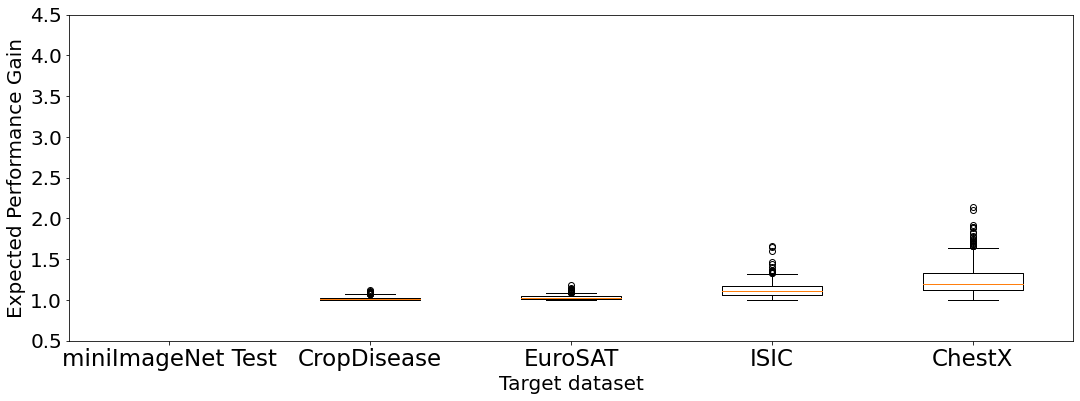

In [234]:
df = pd.DataFrame()
for data in datas:
    path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_head_default/test_history.csv'.format(data)
    test_acc = pd.read_csv(path, index_col='Unnamed: 0')
    epg = test_acc.max(axis=1) / test_acc.iloc[:,-1]
    df = pd.concat([df, epg], axis = 1)
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xticklabels(["miniImageNet Test", "CropDisease", "EuroSAT", "ISIC", "ChestX"], fontsize=23)
ax.boxplot(df)
#plt.title("5 way 1 shot", fontsize = 25)
plt.xlabel("Target dataset", fontsize = 20)
plt.ylabel("Expected Performance Gain", fontsize = 20)
plt.yticks(np.arange(0.5, 5.0, step=0.5) ,fontsize = 20)
plt.show()

/tmp/ipykernel_8404/1654437404.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["miniImageNet Test", "CropDisease", "EuroSAT", "ISIC", "ChestX"], fontsize=23)


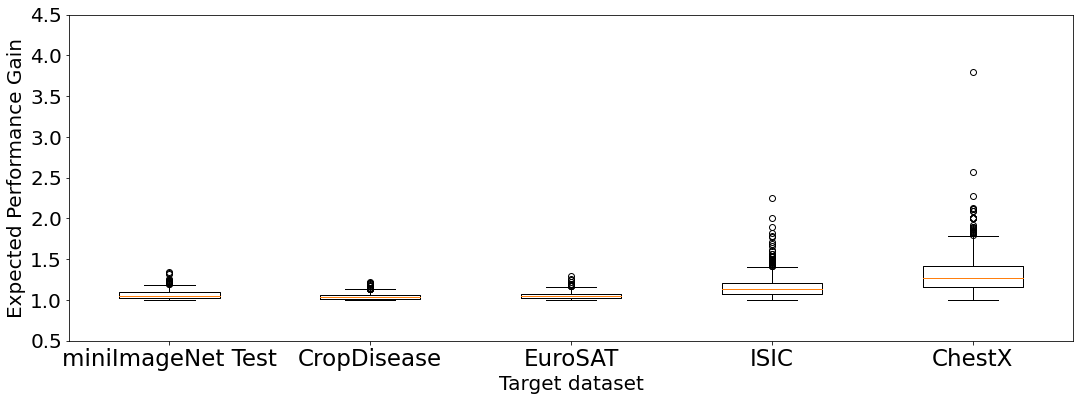

In [232]:
df = pd.DataFrame()
for data in datas:
    path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history_cutmix_v1_30_70.csv'.format(data)
    test_acc = pd.read_csv(path, index_col='Unnamed: 0')
    epg = test_acc.max(axis=1) / test_acc.iloc[:,-1]
    df = pd.concat([df, epg], axis = 1)
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xticklabels(["miniImageNet Test", "CropDisease", "EuroSAT", "ISIC", "ChestX"], fontsize=23)
ax.boxplot(df)
#plt.title("5 way 1 shot", fontsize = 25)
plt.xlabel("Target dataset", fontsize = 20)
plt.ylabel("Expected Performance Gain", fontsize = 20)
plt.yticks(np.arange(0.5, 5.0, step=0.5) ,fontsize = 20)
plt.show()

/tmp/ipykernel_8404/4274686965.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["miniImageNet Test", "CropDisease", "EuroSAT", "ISIC", "ChestX"], fontsize=23)


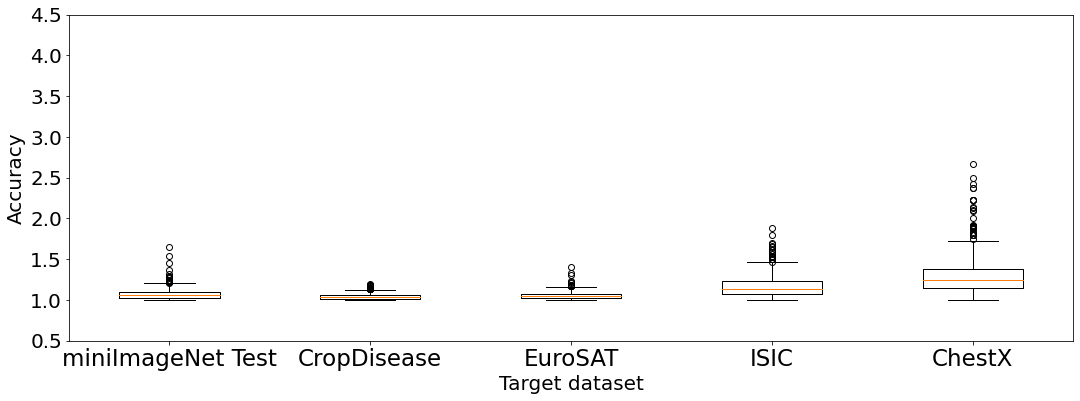

In [231]:
df = pd.DataFrame()
for data in datas:
    path = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history_mixup_v1_30_70.csv'.format(data)
    test_acc = pd.read_csv(path, index_col='Unnamed: 0')
    epg = test_acc.max(axis=1) / test_acc.iloc[:,-1]
    df = pd.concat([df, epg], axis = 1)
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xticklabels(["miniImageNet Test", "CropDisease", "EuroSAT", "ISIC", "ChestX"], fontsize=23)
ax.boxplot(df)
#plt.title("5 way 1 shot", fontsize = 25)
plt.xlabel("Target dataset", fontsize = 20)
plt.ylabel("Expected Performance Gain", fontsize = 20)
plt.yticks(np.arange(0.5, 5.0, step=0.5) ,fontsize = 20)
plt.show()

In [182]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_manifold_mixup.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,56.73 ± 0.82,76.03 ± 0.64
crop,46.64 ± 1.10,57.22 ± 1.29
euro,43.20 ± 0.76,54.88 ± 0.95
isic,25.66 ± 0.48,29.55 ± 0.54
chest,21.20 ± 0.31,22.86 ± 0.36


In [212]:
data = 'crop'
episode = 547

Testing Accuracy of baseline 75.37 ± 0.85


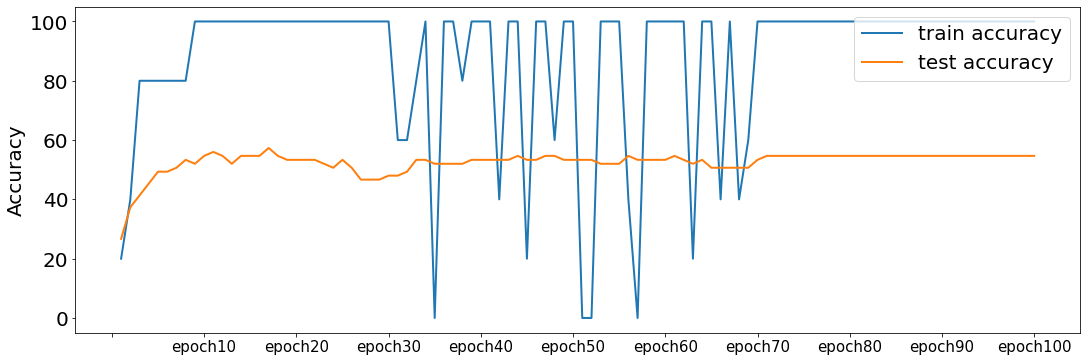

In [219]:
# middle
train_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/train_history_cutmix_v1_30_70.csv'.format(data), index_col='Unnamed: 0')
test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history_cutmix_v1_30_70.csv'.format(data), index_col='Unnamed: 0')
train_acc_clean = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_clean_history_cutmix_v1_30_70.csv'.format(data), index_col='Unnamed: 0')
print ('Testing Accuracy of baseline {:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))
fig = plt.figure(figsize=(18,6))

plt.plot(train_acc.loc[episode]*100, label='train accuracy'.format(episode))
plt.plot(test_acc.loc[episode]*100, label='test accuracy'.format(episode))
#plt.plot(train_acc_clean.loc[episode]*100, label='clean_accuracy'.format(episode))
plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()
plt.close()

In [221]:
epg = test_acc.max(axis=1) - test_acc.iloc[:,-1]
max_idx = np.argmax(epg)
max_epg = epg[idx]
print("index:", max_idx, "epg:",max_epg*100)
print(test_acc.max(axis=1)[max_idx])
print(test_acc.iloc[:,-1][max_idx])

index: 120 epg: 2.666670083999634
0.6800000071525574
0.6133333444595337


Testing Accuracy of baseline 73.12 ± 0.88


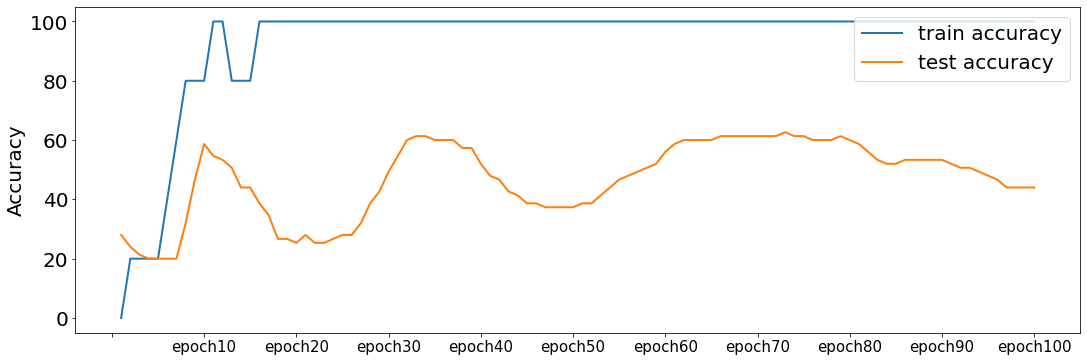

In [224]:
# middle
train_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/train_history.csv'.format(data), index_col='Unnamed: 0')
test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history.csv'.format(data), index_col='Unnamed: 0')
#train_acc_clean = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/euro/05way_005shot_head_default/test_clean_history_cutmix_v1.csv', index_col='Unnamed: 0')
print ('Testing Accuracy of baseline {:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))
fig = plt.figure(figsize=(18,6))

plt.plot(train_acc.loc[episode]*100, label='train accuracy'.format(episode))
plt.plot(test_acc.loc[episode]*100, label='test accuracy'.format(episode))
#plt.plot(train_acc_clean.loc[episode]*100, label='clean_accuracy'.format(episode))
plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()
plt.close()

In [225]:
epg = test_acc.max(axis=1) - test_acc.iloc[:,-1]
max_idx = np.argmax(epg)
max_epg = epg[idx]
print("index:", max_idx, "epg:",max_epg*100)
print(test_acc.max(axis=1)[max_idx])
print(test_acc.iloc[:,-1][max_idx])

index: 546 epg: 0.0
0.800000011920929
0.7733333706855774
